In [9]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 21 18:20:33 2020

@author: jto
"""

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
#import datetime as datetime

In [10]:
# download file

fileName = 'Data-Epidemiologiske-Rapport-21082020-pp98'

import requests
url = 'https://files.ssi.dk/'+fileName
r = requests.get(url, allow_redirects=True)
open(fileName+'.zip', 'wb').write(r.content)

46647

In [11]:
# unzip
import zipfile

path_to_zip_file = fileName+'.zip'
directory_to_extract_to = './data/'

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [12]:
# read municipality cases

df = pd.read_csv('./data/Municipality_cases_time_series.csv',sep=';')#.set_index('date_sample',drop=True)

df['index'] = pd.date_range('2-26-2020',
#              '8-20-2020',
              periods=len(df),
              freq='D')

df = df.set_index('index',drop=True)
df = df.drop('date_sample',axis=1)



In [13]:
#%%

municipalOccupants = {'Odense':2.00703,
                      'Aarhus':3.36411,
                      'Ringsted': 0.33062,
                      'Svendborg': 0.58612}


#%%

cityInvestigate = ['Odense',
                   'Aarhus',
#                   'Ringsted',
                   'Svendborg']


for city in cityInvestigate:
    for i,iIndex in enumerate(df.index):
        if i > 6:
            df.loc[iIndex,city+' incidens'] = sum(df.loc[df.index[j],city] for j in range(i-7,i))/municipalOccupants[city]



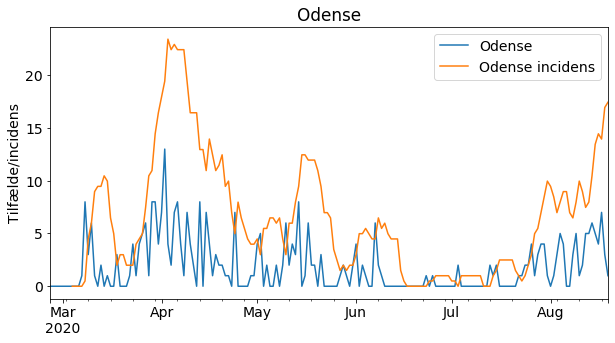

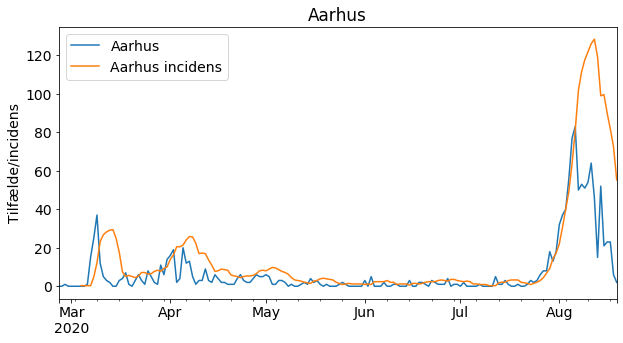

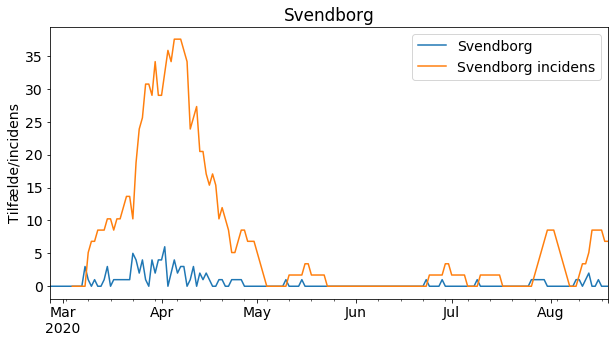

In [14]:
#%%

for city in cityInvestigate:
    ax = df[[city,city+' incidens']].plot(figsize=(10,5))
    ax.set_xlabel('')
    ax.set_ylabel('Tilfælde/incidens')
    ax.set_title(city)

In [29]:
# read municipality cases

dfRt = pd.read_csv('./data/Rt_cases_2020_08_18.csv',sep=';',decimal=',')#.set_index('date_sample',drop=True)

dfRt['index'] = pd.date_range('4-8-2020',
              periods=len(dfRt),
              freq='D')

dfRt = dfRt.set_index('index',drop=True)
dfRt = dfRt.drop('date_sample',axis=1)
dfRt['Eksponentiel vækst'] = [1]*len(dfRt)




Text(0, 0.5, 'Rt')

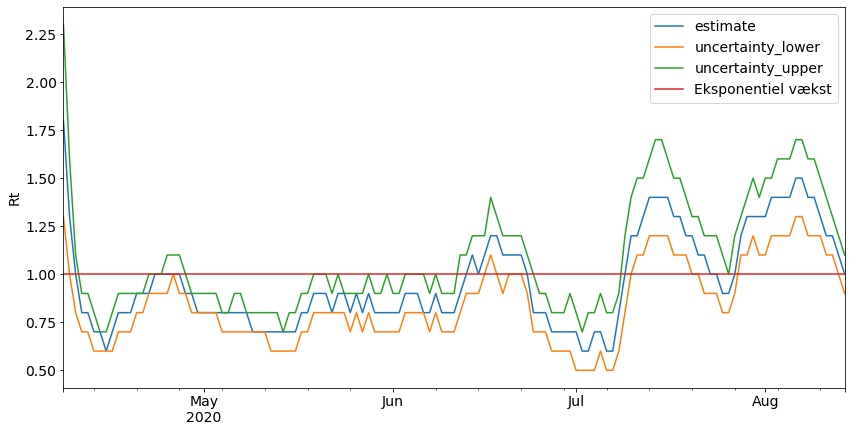

In [32]:
ax = dfRt.plot(figsize=(14,7))
ax.set_xlabel('')
ax.set_ylabel('Rt')